1. Розробити засоби для обліку розрахунків у мережі автозаправок, використовуючи засоби pandas.
Кожна заправка характеризується ідентифікаційним номером і назвою селища-міста, дані усіх за- правок задано окремим csv-файлом. Також в окремому файлі задано ціну кожного виду пального (за 1 л).
Дані про обслуговування задано кількома csv-файлами. Кожен запис про обслуговування містить номер заправки, дату, вид пального, кількість пального в літрах.
Згідно акції, за кожен літр пального PULLS_95 чи PULLS_Diesel 1 грн зараховується на окремий рахунок для закупівлі дронів ШАРК.

2. Вивести:
    
(а) для кожної заправки виручену суму за весь час, вказуючи у переліку номер заправки та її місцезнаходження:
    
(б) діаграму сум відповідно до попереднього пункту;

(в) виручені суми за кожен вид пального усіма заправками (сумарно) селища-міста, обраного за допомогою віджету, за задану дату;

(г) на основі усіх даних суму грошей, зараховану на закупівлю дронів.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets

In [4]:
zap_df = pd.read_csv('zapr.csv')
palne_df = pd.read_csv('price_palne.csv')
obs1 = pd.read_csv('obslugovuvannya1.csv')
obs2 = pd.read_csv('obslugovuvannya2.csv')

In [5]:
obs_df = pd.concat([obs1, obs2], ignore_index=True)

для кожної заправки виручену суму за весь час, вказуючи у переліку номер заправки та її місцезнаходження:

In [6]:
df = zap_df.merge(obs_df, on = 'id_zap')
df = df.merge(palne_df, on = 'palne')
df

,id_zap,vilage,date,palne,count_litr,price_litr
0,10,Lviv,15.08.2023,PULLS_95,8,55
1,10,Lviv,17.09.2023,PULLS_100,19,56
2,11,Nykoncovychi,15.08.2023,PULLS_100,40,56
3,22,Kopachivka,23.09.2023,PULLS_100,20,56
4,20,Lutsk,19.08.2023,PULLS_Diesel,30,58


In [7]:
df['all_money'] = df['count_litr'] * df['price_litr']
df

,id_zap,vilage,date,palne,count_litr,price_litr,all_money
0,10,Lviv,15.08.2023,PULLS_95,8,55,440
1,10,Lviv,17.09.2023,PULLS_100,19,56,1064
2,11,Nykoncovychi,15.08.2023,PULLS_100,40,56,2240
3,22,Kopachivka,23.09.2023,PULLS_100,20,56,1120
4,20,Lutsk,19.08.2023,PULLS_Diesel,30,58,1740


In [8]:
# group1 = df.groupby('id_zap')['all_money'].sum()
# group2 = df.groupby('vilage')['all_money'].sum()
# group3 = pd.DataFrame({'id_zap': group1.index, 'vilage':group2.index})
# group3['money'] = group2.values
# group3
group1 = df.groupby('id_zap')['all_money'].sum()
gg_df = pd.DataFrame({'Total_salary': group1})
gg_df['vilage'] = df.groupby('id_zap')['vilage'].first()
gg_df

,Total_salary,vilage
id_zap,,
10,1504,Lviv
11,2240,Nykoncovychi
20,1740,Lutsk
22,1120,Kopachivka


(б) діаграму сум відповідно до попереднього пункту;

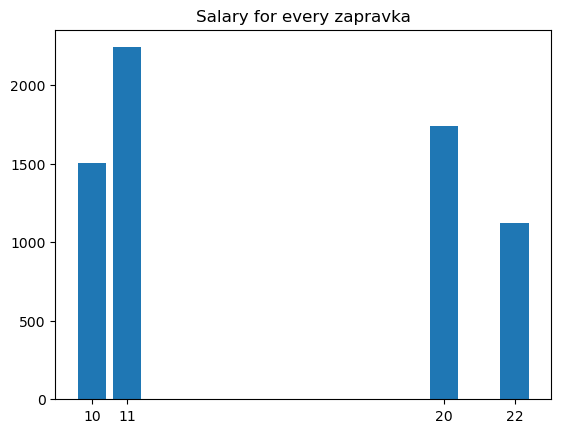

In [9]:
plt.bar(gg_df.index, gg_df['Total_salary'])
plt.xticks(gg_df.index, gg_df.index)
plt.title("Salary for every zapravka")
plt.show()

виручені суми за кожен вид пального усіма заправками (сумарно) селища-міста, обраного за допомогою віджету, за задану дату;

In [ ]:
def sum_palne(date):
    sum_df = pd.DataFrame(df[df['date'] == date])
    pay_df = sum_df.groupby('palne')['all_money'].sum()
    # pay_df = pay_df.sum()
    print(pay_df)
            

In [17]:
widgets.interact(sum_palne, date = df['date'].unique() )
print()

interactive(children=(Dropdown(description='date', options=('15.08.2023', '17.09.2023', '23.09.2023', '19.08.2…

на основі усіх даних суму грошей, зараховану на закупівлю дронів.

In [12]:
dron_df = df[(df['palne'] == 'PULLS_95') | (df['palne'] == 'PULLS_Diesel')]
dron_df

,id_zap,vilage,date,palne,count_litr,price_litr,all_money
0,10,Lviv,15.08.2023,PULLS_95,8,55,440
4,20,Lutsk,19.08.2023,PULLS_Diesel,30,58,1740


In [13]:
dron = dron_df.groupby('palne')['count_litr'].sum()
dron = dron.sum()
dron

38